In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict

## Closures By Sex and County 
https://data.chhs.ca.gov/dataset/vocational-rehabilitation-successful-closures-by-sex-and-county-sfy-2017/resource/7e5d84cb-809f-48f2-ba30-5c62167782b2

In [2]:
df = pd.read_csv("../data/closures_by_sex_and_county.csv")
df.head()

,Year,County,Sex,Successful Closures,Annotation Code,Count Annotation Desc,Percent,Percent Annotation Desc
0,2014,Alameda,Female,266,NaN,NaN,NaN,NaN
1,2014,Alameda,Male,288,NaN,NaN,NaN,NaN
2,2014,Amador,Male,NaN,1.0,Cell suppressed for small number. A score over...,1.0,This value represents less than or equal to 1 ...
3,2014,Butte,Female,44,NaN,NaN,NaN,NaN
4,2014,Butte,Male,69,NaN,NaN,NaN,NaN


## Hearth attack Payement
https://healthdata.gov/dataset/heart-attack-payment-hospital

In [41]:
df = pd.read_csv("../data/payement_hearth_attack.csv")
df.head()

,Facility ID,Facility Name,Address,City,State,ZIP Code,County name,Phone number,Measure ID,Measure Name,...,Lower estimate,Higher estimate,Payment footnote,Value of care display name,Value of care display ID,Value of care category,Value of care footnote,Start Date,End Date,Location
0,351331,TOWNER COUNTY MEDICAL CENTER,HWY 281 N,CANDO,ND,58324,TOWNER,(701) 968-4411,PAYM_90_HIP_KNEE,Payment for hip/knee replacement patients,...,Not Available,Not Available,5.0,Value of Care hip/knee replacement,COMP_PAYM_90_HIP_KNEE,Not Available,13.0,04/01/2015,03/31/2018,"HWY 281 N CANDO, ND 58324"
1,521356,BELLIN HEALTH OCONTO HOSPITAL,820 ARBUTUS AVE,OCONTO,WI,54153,OCONTO,(920) 835-1101,PAYM_30_AMI,Payment for heart attack patients,...,Not Available,Not Available,5.0,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Not Available,13.0,07/01/2015,06/30/2018,"820 ARBUTUS AVE OCONTO, WI 54153 (44.896891, -..."
2,390025,KENSINGTON HOSPITAL,136 W DIAMOND STREET,PHILADELPHIA,PA,19122,PHILADELPHIA,(215) 426-8100,PAYM_30_PN,Payment for pneumonia patients,...,Not Available,Not Available,5.0,Value of Care Pneumonia measure,MORT_PAYM_30_PN,Not Available,13.0,07/01/2015,06/30/2018,"136 W DIAMOND STREET PHILADELPHIA, PA 19122"
3,400128,"HOSPITAL PAVIA HATO REY, INC",AVE PONCE DE LEON 435,HATO REY,PR,919,SAN JUAN,(787) 754-0909,PAYM_30_HF,Payment for heart failure patients,...,Not Available,Not Available,1.0,Value of Care Heart Failure measur,MORT_PAYM_30_HF,Not Available,13.0,07/01/2015,06/30/2018,"AVE PONCE DE LEON 435 HATO REY, PR 00919"
4,141338,MEMORIAL HOSPITAL,1900 STATE ST,CHESTER,IL,62233,RANDOLPH,(618) 826-4581,PAYM_30_PN,Payment for pneumonia patients,...,"$12,818","$16,533",NaN,Value of Care Pneumonia measure,MORT_PAYM_30_PN,Worse Mortality and Lower Payment,NaN,07/01/2015,06/30/2018,"1900 STATE ST CHESTER, IL 62233 (37.918529, -8..."


In [59]:
df.columns

Index(['Facility ID', 'Facility Name', 'Address', 'City', 'State', 'ZIP Code',
       'County name', 'Phone number', 'Measure ID', 'Measure Name',
       'Payment category', 'Denominator', 'Payment', 'Lower estimate',
       'Higher estimate', 'Payment footnote', 'Value of care display name',
       'Value of care display ID', 'Value of care category',
       'Value of care footnote', 'Start Date', 'End Date', 'Location'],
      dtype='object')

In [46]:
df2 = df[df["Measure Name"] == "Payment for heart attack patients"]

In [47]:
dataByState = defaultdict(list)

for state, p in zip(df2["State"].tolist(), df2["Payment"].tolist()):
    if p.startswith('$'):
        p = int(p[1:].replace(",", ""))
        dataByState[state].append(p)

(array([ 2.,  7., 14., 17., 22., 12., 14.,  6.,  4.,  1.]),
 array([21277. , 22114.3, 22951.6, 23788.9, 24626.2, 25463.5, 26300.8,
        27138.1, 27975.4, 28812.7, 29650. ]),
 <a list of 10 Patch objects>)

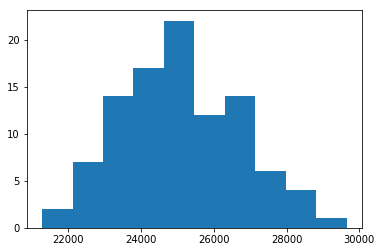

In [48]:
plt.hist(dataByState["IL"])

In [51]:
dataByState.keys()

dict_keys(['KY', 'ME', 'TN', 'MA', 'GA', 'PA', 'TX', 'CA', 'OH', 'VA', 'NY', 'KS', 'AL', 'IA', 'WV', 'IL', 'NC', 'WA', 'LA', 'WI', 'FL', 'VT', 'MI', 'NJ', 'NV', 'CO', 'NE', 'MT', 'SC', 'AR', 'IN', 'MD', 'OR', 'DC', 'AZ', 'MS', 'MO', 'HI', 'OK', 'PR', 'UT', 'MN', 'NM', 'WY', 'ID', 'NH', 'CT', 'RI', 'ND', 'SD', 'DE', 'AK', 'VI', 'GU', 'MP'])

(array([ 7.,  9., 20., 29., 15., 22.,  6.,  1.,  4.,  1.]),
 array([20914., 21845., 22776., 23707., 24638., 25569., 26500., 27431.,
        28362., 29293., 30224.]),
 <a list of 10 Patch objects>)

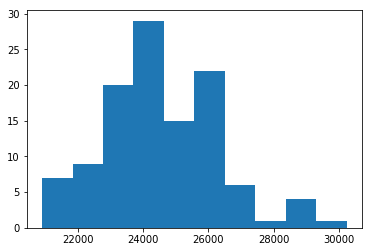

In [58]:
plt.hist(dataByState["NY"])